### Data Preprocessing: Cardiovascular Disease Dataset Mendeley
Source: https://data.mendeley.com/datasets/dzz48mvjht/1

In [2]:
# Import necessary libraries
import pandas as pd

# Replace 'your_dataset.csv' with the actual filename
file_path = 'D:\DigiEcon\MasterThesis\Technical Implementation\DataSets\Menedely_Cardiovascular_Disease_Dataset\Cardiovascular_Disease_Dataset.csv'

# Read the CSV file
df = pd.read_csv(file_path, sep=',')

# Display the first 5 rows to check it loaded correctly
df.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


## Dataset Description provided by the source

| S.No | Attribute                               | Assigned Code        | Unit                            | Type of the Data |
|------|-----------------------------------------|----------------------|---------------------------------|-------------------|
| 1    | Patient Identification Number           | patientid            | Number                          | Numeric           |
| 2    | Age                                     | age                  | In Years                        | Numeric           |
| 3    | Gender                                  | gender               | 0 = (female), 1= (male)      | Binary            |
| 4    | Chest pain type                         | chestpain            | 0,1,2,3 (see below)             | Nominal           |
|      |                                         |                      | 0 = typical angina              |                   |
|      |                                         |                      | 1 = atypical angina             |                   |
|      |                                         |                      | 2 = non-anginal                 |                   |
|      |                                         |                      | 3 = asymptomatic                |                   |
| 5    | Resting blood pressure                  | restingBP            | 94–200 (in mm Hg)              | Numeric           |
| 6    | Serum cholesterol                       | serumcholestrol      | 126–564 (in mg/dl)             | Numeric           |
| 7    | Fasting blood sugar                     | fastingbloodsugar    | 0,1 (>120 mg/dl)                | Binary            |
| 8    | Resting electrocardiogram results       | restingelectro       | 0,1,2 (see below)               | Nominal           |
|      |                                         |                      | 0 = normal                      |                   |
|      |                                         |                      | 1 = ST wave abnormality         |                   |
|      |                                         |                      | 2 = probable/definite LVH       |                   |
| 9    | Maximum heart rate achieved             | maxheartrate         | 71–202                          | Numeric           |
| 10   | Exercise induced angina                 | exerciseangia        | 0,1 (0 = no, 1 = yes)           | Binary            |
| 11   | Oldpeak = ST                            | oldpeak              | 0.0–6.2                         | Numeric           |
| 12   | Slope of the peak exercise ST segment   | slope                | 1,2,3                           | Nominal           |
|      |                                         |                      | 1 = upsloping                   |                   |
|      |                                         |                      | 2 = flat                        |                   |
|      |                                         |                      | 3 = downsloping                 |                   |
| 13   | Number of major vessels                 | noofmajorvessels     | 0,1,2,3                         | Numeric           |
| 14   | Classification                          | target               | 0,1 (0 = absence, 1 = presence) | Binary            |


In [3]:
#Inspect structure = 1000 observations and 14 columns including the target variable
print(df.shape)

(1000, 14)


In [4]:
#look at the data types =  oldpeak is a float, the others inters 
print(df.dtypes)

patientid              int64
age                    int64
gender                 int64
chestpain              int64
restingBP              int64
serumcholestrol        int64
fastingbloodsugar      int64
restingrelectro        int64
maxheartrate           int64
exerciseangia          int64
oldpeak              float64
slope                  int64
noofmajorvessels       int64
target                 int64
dtype: object


In [5]:
# drop the patientid as we have the index number of the dataframe anyways

# Drop the 'id' column
df = df.drop(columns=['patientid'])

In [6]:
#confirm the removal of the patient id column
df.head()

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,31,1,1,199,0,0,2,136,0,5.3,3,2,1


In [7]:
# Define the numerical features 
numerical_cols = [
    'age', 'restingBP', 'serumcholestrol', 
    'maxheartrate', 'oldpeak', 'noofmajorvessels'
]

# Compute summary statistics
summary_stats = pd.DataFrame({
    'Mean': df[numerical_cols].mean(),
    'Min': df[numerical_cols].min(),
    'Max': df[numerical_cols].max()
}).T.round(2)

# Add number of unique values as first row
unique_vals = df[numerical_cols].nunique()
summary_stats.loc['Unique Values'] = unique_vals

# Reorder so that "Unique Values" is the first row
summary_stats = summary_stats.reindex(['Unique Values', 'Mean', 'Min', 'Max'])

# Display result
summary_stats


,age,restingBP,serumcholestrol,maxheartrate,oldpeak,noofmajorvessels
Unique Values,61.00,95.00,344.00,129.00,63.00,4.00
Mean,49.24,151.75,311.45,145.48,2.71,1.22
Min,20.00,94.00,0.00,71.00,0.00,0.00
Max,80.00,200.00,602.00,202.00,6.20,3.00


In [8]:
import pandas as pd

# List of categorical variables based on dataset description
categorical_cols = [
    'chestpain', 
    'slope',          # Nominal: 0,1,2,3
    'restingrelectro',
    'fastingbloodsugar',   # Binary     # Nominal: 0,1,2
    'exerciseangia',       # Binary               # Nominal: 1,2,3
    'target'               # Binary (CVD presence)
]

# Create dictionary to hold formatted distribution results
distribution_dict = {}

# Loop through categorical columns and compute value counts + percentages
for col in categorical_cols:
    count_series = df[col].value_counts().sort_index()
    percent_series = df[col].value_counts(normalize=True).sort_index() * 100

    # Combine into "count (percent%)" format
    combined = count_series.astype(str) + ' (' + percent_series.round(1).astype(str) + '%)'
    distribution_dict[col] = combined

# Create DataFrame, transpose for readability
distribution_df = pd.DataFrame(distribution_dict).fillna('-').T
distribution_df.index.name = 'Variable'
distribution_df.columns.name = 'Value'

# Display the distribution table
display(distribution_df)

Value,0,1,2,3
Variable,,,,
chestpain,420 (42.0%),224 (22.4%),312 (31.2%),44 (4.4%)
slope,180 (18.0%),299 (29.9%),322 (32.2%),199 (19.9%)
restingrelectro,454 (45.4%),344 (34.4%),202 (20.2%),-
fastingbloodsugar,704 (70.4%),296 (29.6%),-,-
exerciseangia,502 (50.2%),498 (49.8%),-,-
target,420 (42.0%),580 (58.0%),-,-


In [9]:
# General overview and check for missing values = no missing values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                1000 non-null   int64  
 1   gender             1000 non-null   int64  
 2   chestpain          1000 non-null   int64  
 3   restingBP          1000 non-null   int64  
 4   serumcholestrol    1000 non-null   int64  
 5   fastingbloodsugar  1000 non-null   int64  
 6   restingrelectro    1000 non-null   int64  
 7   maxheartrate       1000 non-null   int64  
 8   exerciseangia      1000 non-null   int64  
 9   oldpeak            1000 non-null   float64
 10  slope              1000 non-null   int64  
 11  noofmajorvessels   1000 non-null   int64  
 12  target             1000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 101.7 KB


In [10]:
# check again for missing values with is null = none missing values 
df.isnull().sum()

age                  0
gender               0
chestpain            0
restingBP            0
serumcholestrol      0
fastingbloodsugar    0
restingrelectro      0
maxheartrate         0
exerciseangia        0
oldpeak              0
slope                0
noofmajorvessels     0
target               0
dtype: int64

In [11]:
#to get a general overview of the data 
df.describe().round(2)

#average patient age is 49 years
#gender is 0,1
#chestpain - has 4 types
#restingBP - check outliers
#serumcholestrol - check outliers
# fastingbloodsugar - is categorial Yes/no
#restingrelectro - categorical code 0-2
#maxheartrate - check outliers
#exerciseangia - categorial code 0 and 1
#oldpeak - check outliers
#slope - categorial code 1 to 3, check the 0
#noofmajorvessels - categorial code 0 to 3
#target variable: 0 = no disease, 1 = disease

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.0,1000.00,1000.00,1000.00,1000.00
mean,49.24,0.76,0.98,151.75,311.45,0.30,0.75,145.48,0.5,2.71,1.54,1.22,0.58
std,17.86,0.42,0.95,29.97,132.44,0.46,0.77,34.19,0.5,1.72,1.00,0.98,0.49
min,20.00,0.00,0.00,94.00,0.00,0.00,0.00,71.00,0.0,0.00,0.00,0.00,0.00
25%,34.00,1.00,0.00,129.00,235.75,0.00,0.00,119.75,0.0,1.30,1.00,0.00,0.00
50%,49.00,1.00,1.00,147.00,318.00,0.00,1.00,146.00,0.0,2.40,2.00,1.00,1.00
75%,64.25,1.00,2.00,181.00,404.25,1.00,1.00,175.00,1.0,4.10,2.00,2.00,1.00
max,80.00,1.00,3.00,200.00,602.00,1.00,2.00,202.00,1.0,6.20,3.00,3.00,1.00


In [12]:
#shows number per unique column to detect columns with variations 
df.nunique()

age                   61
gender                 2
chestpain              4
restingBP             95
serumcholestrol      344
fastingbloodsugar      2
restingrelectro        3
maxheartrate         129
exerciseangia          2
oldpeak               63
slope                  4
noofmajorvessels       4
target                 2
dtype: int64

In [13]:
# Count frequency of unique values in the 'slope' column
print(df['slope'].value_counts().sort_index())

# Check how many entries have slope = 0
invalid_slope_count = (df['slope'] == 0).sum()
print(f"Invalid slope entries (value = 0): {invalid_slope_count}")

slope
0    180
1    299
2    322
3    199
Name: count, dtype: int64
Invalid slope entries (value = 0): 180


In [14]:
# Get the mode of valid slope values (excluding 0)
valid_slope_mode = df.loc[df['slope'] != 0, 'slope'].mode()[0]

# Replace 0s with the mode
df['slope'] = df['slope'].replace(0, valid_slope_mode)

print(f"Replaced invalid slope values (0) with mode: {valid_slope_mode}")

Replaced invalid slope values (0) with mode: 2


### Checking for Outliers: resting BP, serumcholestrol, maxheartrate, oldpeak

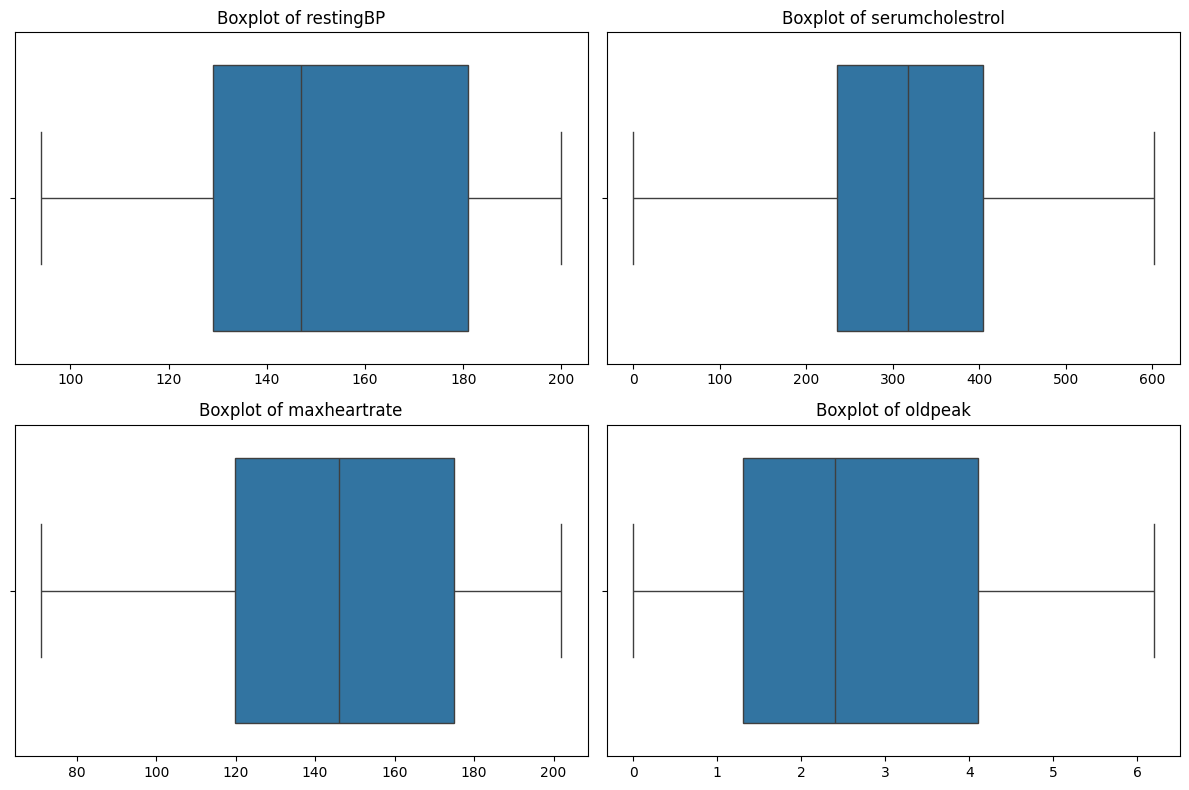

In [15]:
#using boxplots for outliers visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Variables to plot
num_cols = ['restingBP', 'serumcholestrol', 'maxheartrate', 'oldpeak']

# Create boxplots 
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel('')

plt.tight_layout()
plt.show()

## Interpretation of Boxplots

### 1. Resting Blood Pressure (`restingBP`)
- Fairly symmetrical distribution.
- Range: ~95 to 200 mm Hg.
- No significant outliers.

### 2. Serum Cholesterol (`serumcholestrol`)
- Slight right-skew due to higher values.
- Range: 0 to ~600 mg/dL.
- Zeros likely represent missing values—requires data cleaning.
- Potential outliers at the upper end.

### 3. Maximum Heart Rate (`maxheartrate`)
- Symmetrical, compact distribution.
- Range: ~70 to 200 bpm.
- Minimal to no outliers.
- Variable appears clean.

### 4. Oldpeak (`oldpeak`)
- Right-skewed distribution.
- Range: 0 to ~6.2.

## Summary Recommendations
- Treat zero values in `serumcholestrol` as missing.
- Optionally transform `oldpeak` to address skewness.
- No major issues with `restingBP` and `maxheartrate`.


#### Outlier Treatment: serumcholestrol

In [16]:
# Count how many zero values are present in the 'serumcholestrol' column
zero_count = (df['serumcholestrol'] == 0).sum()

print(f"0 in 'serumcholestrol': {zero_count}")

0 in 'serumcholestrol': 53


In [17]:
import numpy as np

# Replace 0 with NaN
df['serumcholestrol'] = df['serumcholestrol'].replace(0, np.nan)

# Impute missing values using the mean
mean_chol = df['serumcholestrol'].mean()
df['serumcholestrol'] = df['serumcholestrol'].fillna(mean_chol)

print(f"Imputed serumcholestrol using mean: {mean_chol:.2f}")

Imputed serumcholestrol using mean: 328.88


In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Variables to analyze for outliers
cols_to_check = ['serumcholestrol', 'restingBP', 'maxheartrate', 'oldpeak']

# Function to detect outliers using Interquartile Range (IQR)
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    print(f"\n{column}:")
    print(f"IQR: {IQR:.2f}, Lower Bound: {lower_bound:.2f}, Upper Bound: {upper_bound:.2f}")
    print(f"Number of outliers: {len(outliers)}")
    
    return outliers

# Run detection for each variable
for col in cols_to_check:
    detect_outliers(df, col)


serumcholestrol:
IQR: 155.25, Lower Bound: 16.12, Upper Bound: 637.12
Number of outliers: 0

restingBP:
IQR: 52.00, Lower Bound: 51.00, Upper Bound: 259.00
Number of outliers: 0

maxheartrate:
IQR: 55.25, Lower Bound: 36.88, Upper Bound: 257.88
Number of outliers: 0

oldpeak:
IQR: 2.80, Lower Bound: -2.90, Upper Bound: 8.30
Number of outliers: 0


#### Outlier Treatment: serumcholestrol

In [19]:
#cap extreme values above 300 
df['serumcholestrol'] = df['serumcholestrol'].apply(lambda x: min(x, 300))

#### Outlier Treatment: restingBP

In [20]:
# Cap extreme values in restingBP at 200 mm Hg
df['restingBP'] = df['restingBP'].clip(upper=170)

#### Outlier Treatment: maxheartrate

In [21]:
# Cap unrealistic values in maxheartrate
df['maxheartrate'] = df['maxheartrate'].clip(lower=90)

#### Outlier Treatment: oldpeak
While values above 4–5 mm indicate significant ST depression (and thus more severe cardiac stress test results), in clinical datasets, values slightly above that (like 6.2 mm) can appear in high-risk cases. There’s no strict clinical “cutoff” beyond which values are impossible.

In [22]:
# Summary statistics after cleaning -> the 4 variables look fine now with the plausible range as an upper limit 
summary = df.describe()
print(summary)

              age       gender    chestpain    restingBP  serumcholestrol  \
count  1000.00000  1000.000000  1000.000000  1000.000000      1000.000000   
mean     49.24200     0.765000     0.980000   145.921000       268.774000   
std      17.86473     0.424211     0.953157    22.865073        50.248142   
min      20.00000     0.000000     0.000000    94.000000        85.000000   
25%      34.00000     1.000000     0.000000   129.000000       249.000000   
50%      49.00000     1.000000     1.000000   147.000000       300.000000   
75%      64.25000     1.000000     2.000000   170.000000       300.000000   
max      80.00000     1.000000     3.000000   170.000000       300.000000   

       fastingbloodsugar  restingrelectro  maxheartrate  exerciseangia  \
count        1000.000000      1000.000000   1000.000000    1000.000000   
mean            0.296000         0.748000    146.167000       0.498000   
std             0.456719         0.770123     32.899445       0.500246   
min       

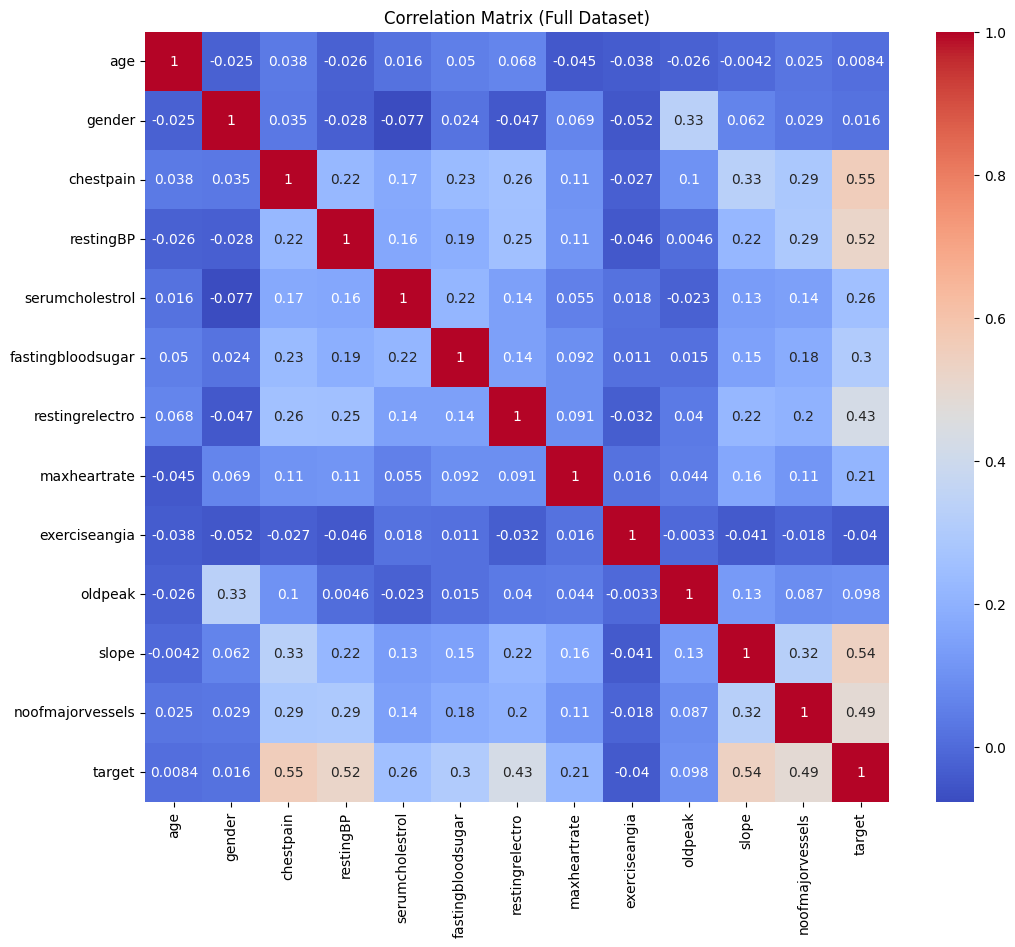

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix using full dataset
corr_matrix_full = df.corr()

# Plot correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_full, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (Full Dataset)")
plt.show()


In [24]:
#see the distribution of the target variable 
df['target'].value_counts()

target
1    580
0    420
Name: count, dtype: int64

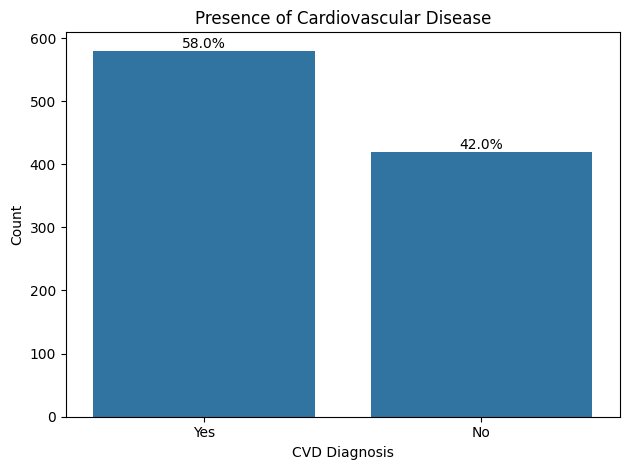

target
Yes    0.58
No     0.42
Name: proportion, dtype: float64


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Map target values to labels
df_target = df.copy()
df_target['target'] = df_target['target'].map({0: 'No', 1: 'Yes'})

# Plot
ax = sns.countplot(x='target', data=df_target)
plt.title("Presence of Cardiovascular Disease")
plt.xlabel("CVD Diagnosis")
plt.ylabel("Count")

# Add percentage labels
total = len(df_target)
for p in ax.patches:
    count = p.get_height()
    percentage = f'{100 * count / total:.1f}%'
    ax.annotate(percentage,
                (p.get_x() + p.get_width() / 2., count),
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Optional: Print percentages to console
print(df_target['target'].value_counts(normalize=True))

#### Explore Gender distribution

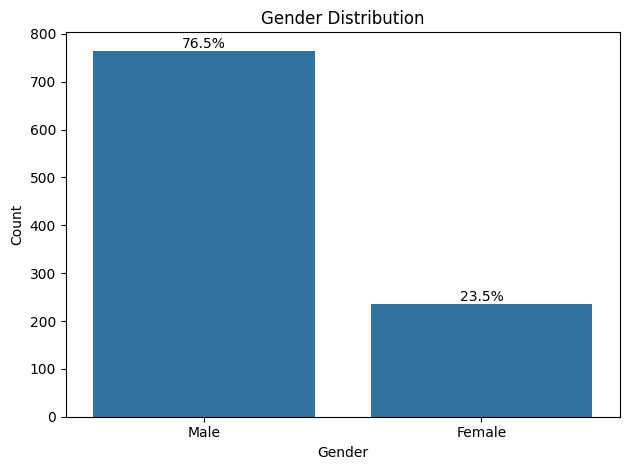

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Map gender values to labels
df_gender = df.copy()
df_gender['gender'] = df_gender['gender'].map({0: 'Female', 1: 'Male'})

# Plot
ax = sns.countplot(x='gender', data=df_gender)
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")

# Add percentages on bars
total = len(df_gender)
for p in ax.patches:
    count = p.get_height()
    percentage = f'{100 * count / total:.1f}%'
    ax.annotate(percentage,
                (p.get_x() + p.get_width() / 2., count),
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

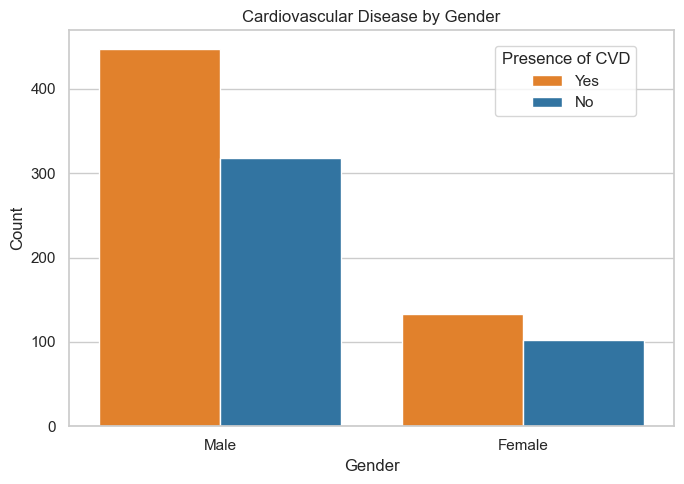

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare the data
df_plot = df.copy()
df_plot['gender'] = df_plot['gender'].map({0: 'Female', 1: 'Male'})
df_plot['target'] = df_plot['target'].map({0: 'No', 1: 'Yes'})  # for legend clarity

# Set seaborn style
sns.set(style="whitegrid")

# Use a colorblind-safe palette: Blue for No, Orange for Yes
custom_palette = {'No': '#1f77b4', 'Yes': '#ff7f0e'}  # Blue, Orange

# Create the plot
plt.figure(figsize=(7, 5))
ax = sns.countplot(x='gender', hue='target', data=df_plot, palette=custom_palette)

# Titles and labels
plt.title("Cardiovascular Disease by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")

# Updated legend
handles, labels = ax.get_legend_handles_labels()
plt.legend(
    handles=handles,
    labels=labels,
    title="Presence of CVD",
    loc='upper right',
    bbox_to_anchor=(0.95, 0.98)
)

plt.tight_layout()
plt.show()

In [28]:
# Gender-wise cardio outcome
pd.crosstab(df['gender'], df['target'], normalize='index')

target,0,1
gender,,
0,0.434043,0.565957
1,0.415686,0.584314


In [29]:
# Save the balanced dataset to CSV
df.to_csv('MendeleyData.csv', index=False)